In [277]:
import os
os.chdir('C:/Users/David/Desktop/Grad School/6. ISYE-6740 (CDA)/Project/Data/Cleaned')

In [278]:
from sklearn import svm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [279]:
#df= pd.read_csv("clustered_data.csv")
#df_data = df.loc[ :, ['avg_orb_percent', 'max_vorp']]
#df_target = df['cluster_label']

df = pd.read_csv("clustered_data.csv")
df_data = df.loc[ :, ['avg_orb_percent', 'max_vorp']][df['cluster_label'].isin([3,4])]
df_target = df['cluster_label'][df['cluster_label'].isin([3,4])]

#df = pd.read_csv("clustered_data.csv")
#df_data = df.loc[ :, ['avg_orb_percent', 'max_vorp']][df['cluster_label'].isin([1,6])]
#df_target = df['cluster_label'][df['cluster_label'].isin([1,6])]

In [280]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.2,random_state=3)

In [281]:
print('Number of rows in cluster dataset: ' + str(len(df)))
print('Number of rows in training dataset: ' + str(len(X_train)))
print('Number of rows in testing dataset: ' + str(len(X_test)))

Number of rows in cluster dataset: 1896
Number of rows in training dataset: 268
Number of rows in testing dataset: 68


In [282]:
clf = svm.SVC(kernel='linear')

In [283]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [284]:
y_pred = clf.predict(X_test)

In [285]:
print("Linear Classifier Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Linear Classifier Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Linear Classifier Recall:", metrics.recall_score(y_test, y_pred, average='macro'))

Linear Classifier Accuracy: 0.9411764705882353
Linear Classifier Precision: 0.9661016949152542
Linear Classifier Recall: 0.8461538461538461


In [264]:
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

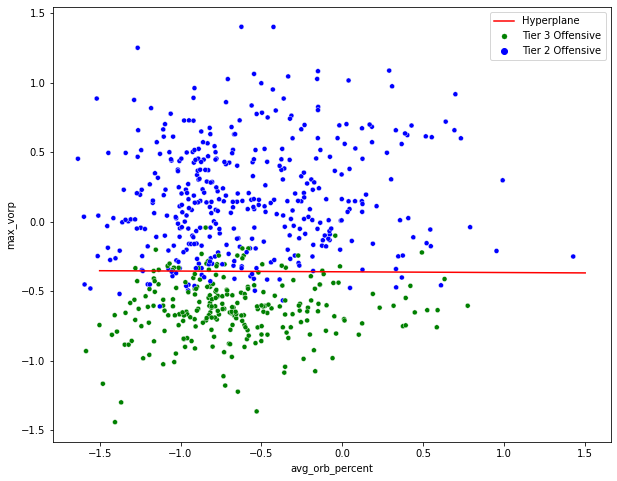

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train.iloc[:, 0], 
                y=X_train.iloc[:, 1], 
                hue=y_train,
                palette=['blue','green'],
                s=25);
w = clf.coef_[0]
b = clf.intercept_[0]
x_points = np.linspace(-1.5, 1.5)
y_points = -(w[0] / w[1]) * x_points - b / w[1] 
plt.plot(x_points, y_points, c='r');
plt.legend(labels=['Hyperplane', 'Tier 3 Offensive', 'Tier 2 Offensive'])
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[1].set_color('green')
leg.legendHandles[2].set_color('blue')
os.chdir('C:/Users/David/Desktop/Grad School/6. ISYE-6740 (CDA)/Project')
plt.savefig('clf_linear_fs2_top2.png')